In [1]:
import tables
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import linear_model
%matplotlib inline

#This notebook is for training regression models from WB feature vectors to WB census data

data=tables.open_file('west_bengal_fv_reg_pca.h5','r')
#all_features=data.root.data.read()
#features=(all_features[:,:,0,0]+all_features[:,:,0,1]+all_features[:,:,1,0]+all_features[:,:,1,1])/4.0
features=np.load("WestBengalVillFeatures.npy") 
X=features
#Now we set up labels
#Read the csv file and load villages 
targets=np.loadtxt('newFile.csv',delimiter="\t",skiprows=1)
#First try with PCA on X
#pca=decomposition.PCA()
#X_PCA=pca.fit_transform(X)
X_PCA=np.load('PCAComponents.npy')
print X_PCA.shape

(36889, 4096)


In [4]:
def debugModel(X,y,trainsplit,ncomp):
    reg=linear_model.LinearRegression(fit_intercept=True,n_jobs=24,normalize=False)
    reg.fit(X[:,:ncomp][:trainsplit],y[:trainsplit])
    trainscore=reg.score(X[:,:ncomp][:trainsplit],y[:trainsplit])
    testscore=reg.score(X[:,:ncomp][trainsplit:],y[trainsplit:])
    #print "Train set score is : %s" %(trainscore)
    #print "Test set score is : %s" %(testscore)
    return (trainscore,testscore)

print ids[36888]
'%.0f' % targets[36888,0]

In [7]:
y=targets[:,1]

#Now X and y are set, time for regression
print "Shape of data : ", X.shape
print "Shape of labels : ", y.shape

Shape of data :  (36889, 4096)
Shape of labels :  (36889,)


In [ ]:
reg=linear_model.LinearRegression(fit_intercept=True,n_jobs=24,normalize=False)
#train the model on complete dataset with 30:6 test:train split
reg.fit(X[:30000],y[:30000])

In [11]:
#Score the model separately on test and train
n=30000
print "Train R2 score : %s" %(reg.score(X[:n],y[:n]))
print "Test R2 score : %s" %(reg.score(X[n:],y[n:]))

Train R2 score : 0.285731981987
Test R2 score : -0.154439716122


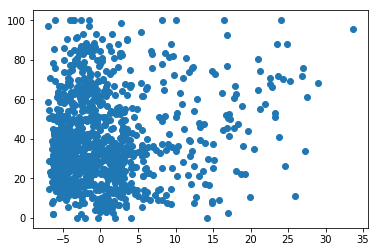

In [13]:
#Plot of the first PCA component
plt.scatter(X_PCA[:,0][:1000],y[:1000])

In [29]:
#Now with PCA and test-train split
trainsplit=30000
ncomp=10
reg1=linear_model.LinearRegression(fit_intercept=True,n_jobs=24,normalize=False)
reg1.fit(X_PCA[:,:ncomp][:trainsplit],y[:trainsplit])
print "Train set score is : %s" %(reg1.score(X_PCA[:,:ncomp][:trainsplit],y[:trainsplit]))
print "Test set score is : %s" %(reg1.score(X_PCA[:,:ncomp][trainsplit:],y[trainsplit:]))

Train set score is : 0.0988761813028
Test set score is : 0.0933357882749


In [15]:
trainScores1=[]
testScores1=[]
for comp in range(1,200,1):
    scores=debugModel(X_PCA,y,30000,comp)
    trainScores1.append(scores[0])
    testScores1.append(scores[1])
#print "Done",trainScores,testScores 

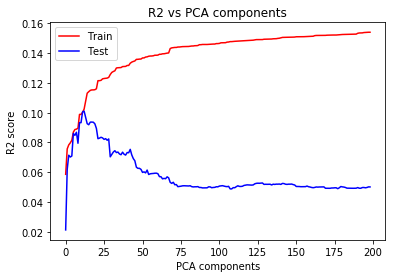

In [46]:
step=1
fig,ax=plt.subplots()
ax.plot(range(0,step*len(trainScores1),step),trainScores1,'r',label='Train')
ax.plot(range(0,step*len(testScores1),step),testScores1,'b',label='Test')
ax.set_xlabel('PCA components')
ax.set_ylabel('R2 score')
ax.set_title('R2 vs PCA components')
ax.legend()


In [33]:
#plot acuraccies for test train splits
#Now lets vary the train split
trainsplits=range(1000,36000,1000)
comp=12
trainScores=[]
testScores=[]
for split in trainsplits:
    scores=debugModel(split,comp)
    trainScores.append(scores[0])
    testScores.append(scores[1])

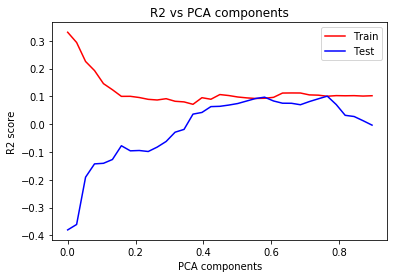

In [50]:
step=1000
fig,ax=plt.subplots()
splitvalues=np.arange(0,step*len(trainScores),step)*1./37888.0;
ax.plot(splitvalues,trainScores,'r',label='Train')
ax.plot(splitvalues,testScores,'b',label='Test')
ax.set_xlabel('PCA components')
ax.set_ylabel('R2 score')
ax.set_title('R2 vs PCA components')
ax.legend()


In [2]:
#Now we do regression on all columns
#Loading csv file
import pandas as pd
labeldata=pd.read_csv('all_and_pca.csv',delimiter=',')
labeldata.head()

,vill-code,state-code,state,district-code,district-name,teh-code,teh-name,vill-code.1,ward-no,area-name,...,no-assets,banking-services-availability,cook-fuel-natural,cook-fuel-processed,no-cooking,bathroom-within,bathroom-outside,pca1,pca2,target
0,1932702154306145,19,WEST BENGAL,327,Darjiling,2154,Darjeeling Pulbazar,306145,0,Singalila Forest,...,37.3,25.5,100.0,0.0,0.0,38.5,61.5,-12.026055,34.015382,0.0
1,1932702154306146,19,WEST BENGAL,327,Darjiling,2154,Darjeeling Pulbazar,306146,0,Rimbick,...,28.1,53.6,83.5,16.4,0.1,51.2,48.8,32.794807,7.041035,0.0
2,1932702154306147,19,WEST BENGAL,327,Darjiling,2154,Darjeeling Pulbazar,306147,0,Namla,...,18.8,52.5,85.8,13.5,0.8,51.9,48.1,52.542293,-12.130106,0.0
3,1932702154306148,19,WEST BENGAL,327,Darjiling,2154,Darjeeling Pulbazar,306148,0,Lodhama,...,2.0,44.2,99.3,0.7,0.0,15.7,84.4,-1.343902,-15.780446,0.0
4,1932702154306149,19,WEST BENGAL,327,Darjiling,2154,Darjeeling Pulbazar,306149,0,Hatta,...,25.2,84.5,97.7,2.1,0.3,33.6,66.4,-4.278414,7.846165,0.0


In [17]:
def getaccstats(X,y,compmax,step):
    reg=linear_model.LinearRegression(fit_intercept=True,n_jobs=24,normalize=False)
    trainScores=[]
    testScores=[]
    step=1
    for comp in range(1,compmax,step):
        scores=debugModel(X,y,30000,comp)
        trainScores.append(scores[0])
        testScores.append(scores[1])
    return (trainScores,testScores)
#print "Done",trainScores,testScores

In [18]:
def plotit(trainScores,testScores,title,compmax,step):
    fig,ax=plt.subplots()
    length=len(trainScores)
    ax.plot(range(0,step*length,step),trainScores,'r',label='Train')
    ax.plot(range(0,step*length,step),testScores,'b',label='Test')
    ax.set_xlabel('PCA components')
    ax.set_ylabel('R2 score')
    ax.set_title(title)
    ax.legend()


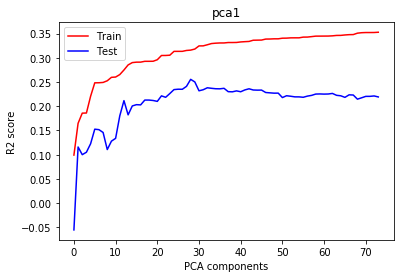

In [19]:
s='pca1'
(a,b)=getaccstats(X_PCA,labeldata[s],75,1)
plotit(a,b,s,75,1)

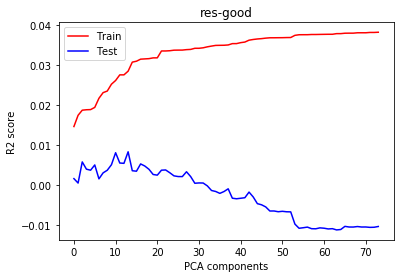

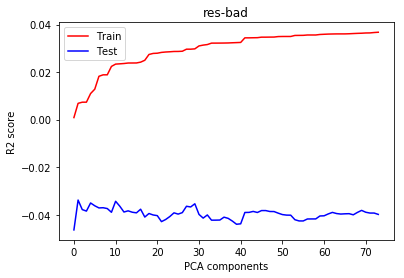

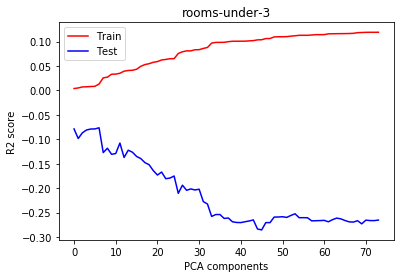

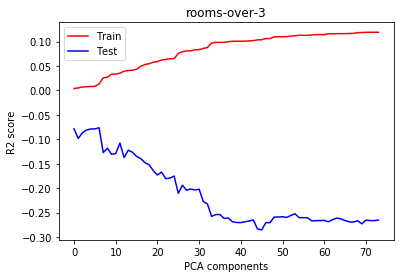

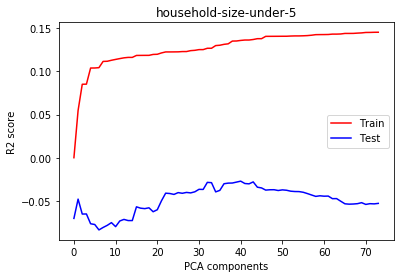

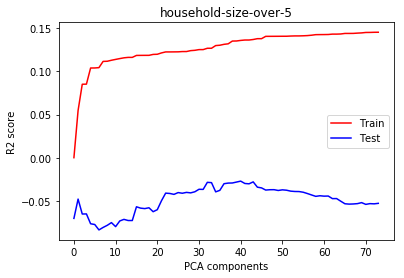

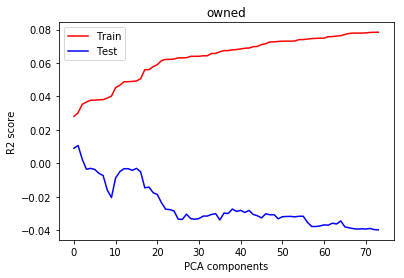

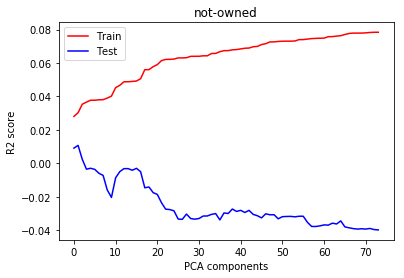

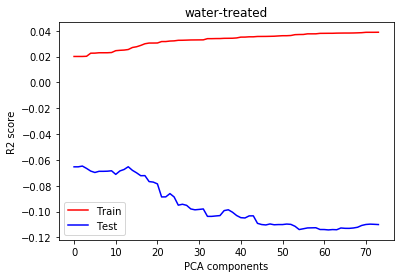

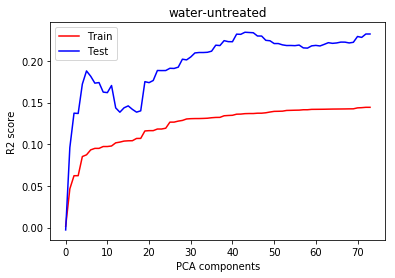

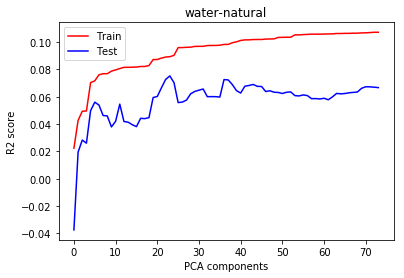

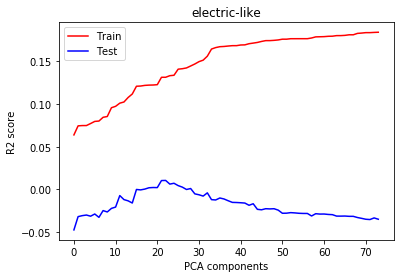

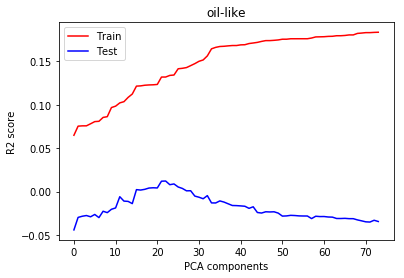

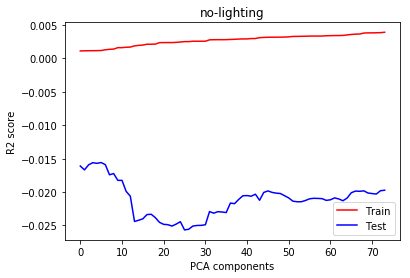

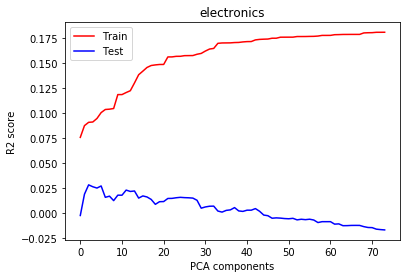

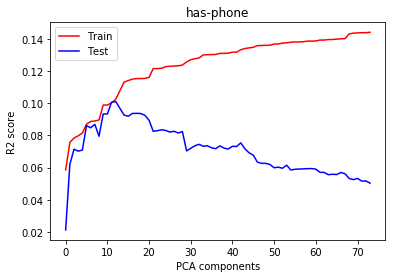

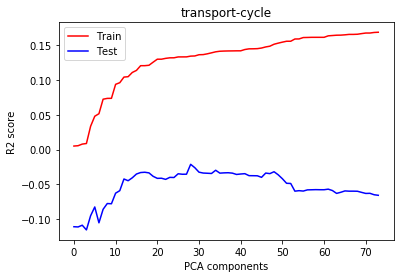

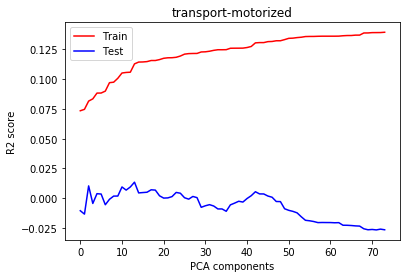

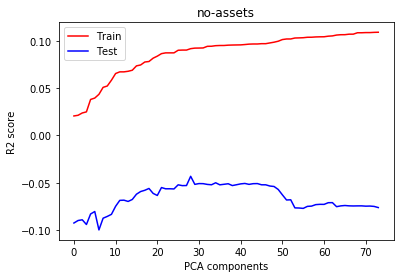

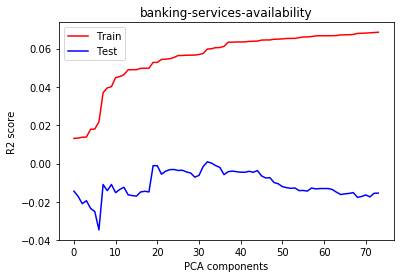

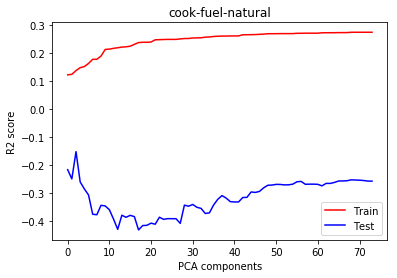

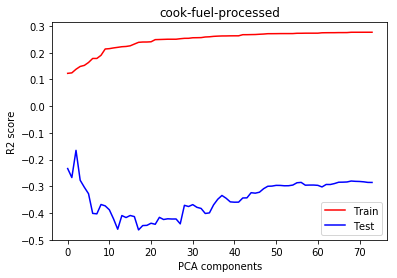

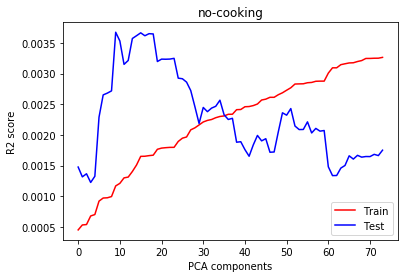

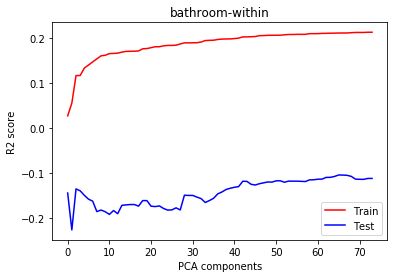

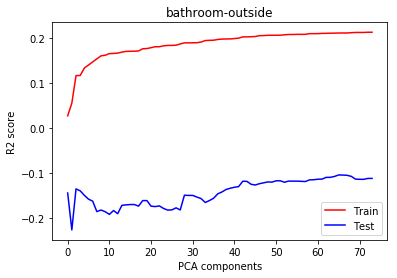

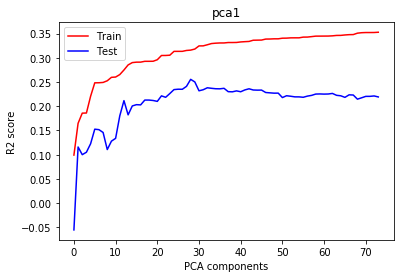

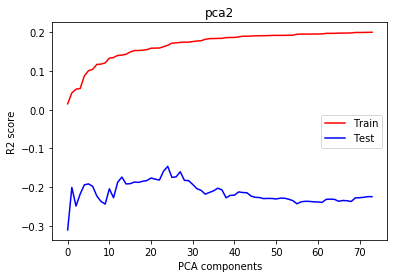

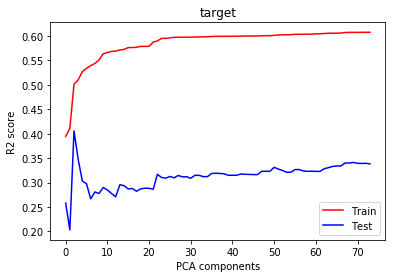

In [24]:
for col in labeldata.columns[11:]:
    (a,b)=getaccstats(X_PCA,labeldata[col],75,2)
    plotit(a,b,col,75,1)

In [ ]:
step=1
fig,ax=plt.subplots()
ax.plot(range(0,step*len(trainScores1),step),trainScores1,'r',label='Train')
ax.plot(range(0,step*len(testScores1),step),testScores1,'b',label='Test')
ax.set_xlabel('PCA components')
ax.set_ylabel('R2 score')
ax.set_title('R2 vs PCA components')
ax.legend()